<a href="https://colab.research.google.com/github/aliash98/BPM_CausalReasoning/blob/main/MarkovianToSemiMarkovian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ylearn

In [2]:
!pip install networkx==2.8

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 54.8 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.0
    Uninstalling networkx-3.0:
      Successfully uninstalled networkx-3.0


In [36]:
# A Markovian Graph 'G' as an input

# Let's assume V4 to be a grey variable such that V1 -> V4 -> D (we no longer have V1 -> D)

import networkx as nx
G = nx.DiGraph()
G.add_nodes_from([
    ('V3', {"color": "grey"}),
    ('V2', {"color": "blue"}),
    ('V1', {"color": "blue"}),
    ('D', {"color": "blue"}),
    ('V4', {"color": "grey"}),
    # ('V5', {"color": "blue"}),
])
G.add_edge('V3', 'V2')
G.add_edge('V3', 'V1')
G.add_edge('V2', 'V1')
G.add_edge('V2', 'D')
# G.add_edge('V1', 'D')

G.add_edge('V1', 'V4')
G.add_edge('V4', 'D')
# G.add_edge('V3', 'V5')

In [37]:
G.nodes()

NodeView(('V3', 'V2', 'V1', 'D', 'V4'))

In [38]:
G.edges()

OutEdgeView([('V3', 'V2'), ('V3', 'V1'), ('V2', 'V1'), ('V2', 'D'), ('V1', 'V4'), ('V4', 'D')])

In [39]:
# Rule 1
# Adding all observed nodes to the new graph

G_sm = nx.DiGraph()
for node in G.nodes(data=True):
  # print(node)
  if node[1]['color'] == 'blue':
    G_sm.add_node(node[0])

G_sm.nodes()

NodeView(('V2', 'V1', 'D'))

In [40]:
# Rule 2
# Importing edges between two blue nodes
for edge in G.edges(data=True):
  from_node = edge[0]
  to_node = edge[1]
  from_node_color = G.nodes[from_node]['color']
  to_node_color = G.nodes[to_node]['color']
  if from_node_color =='blue' and to_node_color =='blue':
    G_sm.add_edge(edge[0], edge[1])

In [32]:
G_sm.edges()

OutEdgeView([('V2', 'V1'), ('V2', 'D')])

In [41]:
# Rule 3
# Adding edges for directed paths through grey nodes between two blue nodes


grey_nodes = [n for n,v in G.nodes(data=True) if v['color'] == 'grey']  
blue_nodes = [n for n,v in G.nodes(data=True) if v['color'] == 'blue']

for source in blue_nodes:
  for sink in blue_nodes:
    if source == sink or G.has_edge(source, sink):
      continue
    for path in nx.all_simple_paths(G, source=source, target=sink):
      counter = 0
      for between_node in path:
        if between_node in blue_nodes:
          counter += 1
      if counter == 2:
        G_sm.add_edge(source, sink)
        break

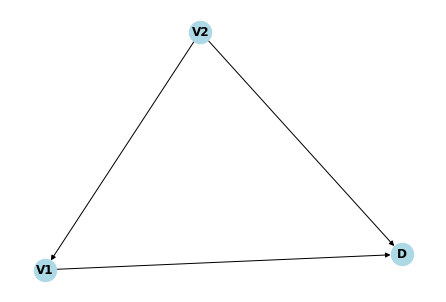

In [42]:
nx.draw(G_sm, with_labels=True, font_weight='bold', node_color='lightblue', node_size=500)

In [43]:
# Rule 4 
# Extracting the hidden confounders

for source in grey_nodes:
  potential_confounding = []
  for sink in blue_nodes:
    for path in nx.all_simple_paths(G, source=source, target=sink):
      red_flag = 0
      for between_node in path:
        if between_node in blue_nodes and between_node != sink:
          red_flag = 1
          break
      if red_flag == 0:
        potential_confounding.append(sink)
        break
  if len(potential_confounding) > 1:
    print(potential_confounding)


        

['V2', 'V1']
